Link Hugging Face : https://huggingface.co/spaces/nurrahmawati3/churn

# MILESTONE 1

## **I. INTRODUCTION**

Name: Nurrahmawati

Batch: FTDS-002

### 1.1 ABOUT THE DATA

In this project, the dataset named Telco Customer Churn from Kaggle in link https://www.kaggle.com/datasets/blastchar/telco-customer-churn. Each row represents a customer, each column contains the customer's attributes. This dataset contains 21 columns (variables) and 7043 rows (customers) with information such as customerID, gender, Phone Service, and Internet Service. 

Customer churn is a fundamental problem for the telecommunication (Telco) industry. It is defined as the loss of customers moved from one Telco operator to another. This sample data module tracks a fictional telco company's customer churn based on a variety of possible factors. The Churn column (response variable) indicates whether the customer departed within the last month or not. The class No includes the clients that did not leave the company last month, while the class Yes contains the clients that decided to terminate their relations with the company. Other columns include gender, dependents, monthly charges, and many with information about the types of services each customer has. 

Here is the data dictionary for this project.

|      `COLUMN`      | DESCRIPTION                                                                                                       |
| :----------------: | :---------------------------------------------------------------------------------------------------------------- |
|    `customerID`    | ID Customer                                                                                                       |
|      `gender`      | Whether the customer is a male or a female                                                                        |
|  `SeniorCitizen`   | Whether the customer is a senior citizen or not **(1, 0)**                                                            |
|     `Partner`      | Whether the customer has a partner or not **(Yes, No)**                                                               |
|    `Dependents`    | Whether the customer has dependents or not **(Yes, No)**                                                              |
|      `tenure`      | Number of months the customer has stayed with the company                                                         |
|   `PhoneService`   | Whether the customer has a phone service or not **(Yes, No)**                                                         |
|  `MultipleLines`   | Whether the customer has multiple lines or not **(Yes, No, No phone service)**                                        |
| `InternetService`  | Customer’s internet service provider **(DSL, Fiber optic, No)**                                                       |
|  `OnlineSecurity`  | Whether the customer has online security or not **(Yes, No, No internet service)**                                    |
|   `OnlineBackup`   | Whether the customer has online backup or not **(Yes, No, No internet service)**                                      |
| `DeviceProtection` | Whether the customer has device protection or not **(Yes, No, No internet service)**                                  |
|   `TechSupport`    | Whether the customer has tech support or not **(Yes, No, No internet service)**                                       |
|   `StreamingTV`    | Whether the customer has streaming TV or not **(Yes, No, No internet service)**                                       |
| `StreamingMovies`  | Whether the customer has streaming movies or not **(Yes, No, No internet service)**                                   |
|     `Contract`     | The contract term of the customer **(Month-to-month, One year, Two year)**                                            |
| `PaperlessBilling` | Whether the customer has paperless billing or not **(Yes, No)**                                                       |
|  `PaymentMethod`   | The customer’s payment method **(Electronic check, Mailed check, Bank transfer (automatic), Credit card(automatic))** |
|  `MonthlyCharges`  | The amount charged to the customer monthly                                                                        |
|   `TotalCharges`   | The total amount charged to the customer                                                                          |
|      `Churn`       | Whether the customer churned or not **(Yes or No)**                                                                   |

### 1.2 OBJECTIVE

Based on these problems, TELCO wants to have a Deep Learning model that has the ability to predict the possibility of customers who will churn or who will not, so that preventive actions can be taken such as providing incentives / promos. But the model must also be able to ensure that it is the customer who will really churn, if it is given to a loyal customer or customer who will not churn, it will actually harm the company.

The company also wants to know the factors / variables that influence the customer to churn, so that TELCO can prepare an improvement strategy for their business.

## **II. IMPORT LIBRARIES**

In [1]:
# common dataframe
import pandas as pd
import numpy as np
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# math & statistic function
import scipy.stats as stats
# import math

# remove all warnings, more robust
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
# preprocessing
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
# import phik
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler

# resampling method
from imblearn.over_sampling import SMOTENC
from collections import Counter

# tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Dropout
from keras.utils import plot_model

# library for model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

# pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipe

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

# Display settings
from sklearn import set_config
set_config(display='diagram')

import warnings
warnings.filterwarnings('ignore')


In [2]:
np.random.seed(42)
tf.random.set_seed(42)

## **III. DATA LOADING**

In [3]:
# Load Dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Checking Basic Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Based on this information data, we can see that there are three data types here, namely object, int64 and float64 types. There are 7043 entries data with 21 columns. However, I observe that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, I need to transform this column into a numeric data type.

In [6]:
missing_values = {}

for x in list(data.columns):
    missing_values[x] = 0
    for y in data[x]:
        if y in ['N/A', '--', '-', 'Null', '?', ' ']: # These are the specific NaN values we will be sweeping for.
            missing_values[x] = missing_values[x] + 1

missing_values

{'customerID': 0,
 'gender': 0,
 'SeniorCitizen': 0,
 'Partner': 0,
 'Dependents': 0,
 'tenure': 0,
 'PhoneService': 0,
 'MultipleLines': 0,
 'InternetService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'PaperlessBilling': 0,
 'PaymentMethod': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 11,
 'Churn': 0}

As shown above, the TotalCharges column apparently, there are missing values in that column. Before handling those missing values, I want to see those data entries that have missing values

Below are data entries that have missing values.

In [7]:
# calling out all rows that contains missing values

data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After analyzed, I found an interesting information from those data entries that have missing values. As we can see above, in tenure column, the values are 0. This is contradictory to present values in MonthlyCharges columns. tenure is the number of months the customer has stayed with the company, while MonthlyCharges is the amount charged to the customer monthly. If the tenure is 0 then the MonthlyCharges supposed to be zero too.

So we have decided to drop those rows from the dataset because there are no other columns, data, or information to do any imputation on the missing values and correct the data contained in the tenure and MonthlyCharges columns.

The next step is checking for duplicate data contained in the dataset. But, before that, I will drop customerID from the dataset because I won't be using that column for my analysis. The customerID column is useless to explain whether not the customer will churn.

In [8]:
# dropping `customerID` column from `data`
data.drop(columns='customerID', inplace=True)

In [9]:
# Checking data duplicated
data[data.duplicated()].shape

(22, 20)

And based on the results of the examination, in the dataset, there are 22 lines of data duplication. In handling this data duplication, We will drop those duplicates from dataset

In [10]:
for i in data.columns.tolist():
    print(f'num of unique label in {i}: ', len(data[i].unique()))

num of unique label in gender:  2
num of unique label in SeniorCitizen:  2
num of unique label in Partner:  2
num of unique label in Dependents:  2
num of unique label in tenure:  73
num of unique label in PhoneService:  2
num of unique label in MultipleLines:  3
num of unique label in InternetService:  3
num of unique label in OnlineSecurity:  3
num of unique label in OnlineBackup:  3
num of unique label in DeviceProtection:  3
num of unique label in TechSupport:  3
num of unique label in StreamingTV:  3
num of unique label in StreamingMovies:  3
num of unique label in Contract:  3
num of unique label in PaperlessBilling:  2
num of unique label in PaymentMethod:  4
num of unique label in MonthlyCharges:  1585
num of unique label in TotalCharges:  6531
num of unique label in Churn:  2


In [11]:
a = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for i in data[a].columns.tolist():
    print(i, '\n')
    print(data[a][i].value_counts().head())
    print('-'*30)

SeniorCitizen 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
------------------------------
gender 

Male      3555
Female    3488
Name: gender, dtype: int64
------------------------------
Partner 

No     3641
Yes    3402
Name: Partner, dtype: int64
------------------------------
Dependents 

No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------------------
PhoneService 

Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------------------
MultipleLines 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------------------
InternetService 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
------------------------------
OnlineBackup 

No                     3

Here is the unique value in PaymentMethod column:

PaymentMethod - Unique Values: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

As we can see, there are values containing brackets, I want to remove the ' (automatic)' to avoid some error that may occur while I am doing exploratory data analysis and for better encoding puposes.

In addition, for some columns that have unique values ​​such as 'No internet service' and 'No phone service' will be combined into the 'No' class of each column, because it does not give any usefull information and if we delete it, it will not affect data.


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Based on the results described above, it is known that there are no oddities in the numerical data, such as the missing value 99999 etc., so that this data can be processed at a later stage up to modeling. For SeniorCitizen, in this column the data type is still int64 so we will change the data type to object

Based on the general description:

- Change tenure dtype from object to numeric
- Change SeniorCitizen from int64 to object
- Dropping all rows that have missing values because there is no additional information or supporting columns to fill those null values, moreover the rows that have missing values have an oddity in the tenure and MonthlyCharges columns 
- Drop duplicate data 
- Columns manipulation, there are values containing brackets in unique values PaymentMethod, changin 'No internet service' and 'No phone service' to 'No', and then changin 'Yes' to 1 and 'No' to 0 for target


## **IV. DATA CLEANING**

In [13]:
data_clean = data.copy()
data_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# Checking Basic Information
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
# changing `TotalCharges` dtype from object to numeric
data_clean['TotalCharges'] = pd.to_numeric(data_clean['TotalCharges'], errors='coerce')

In [16]:
# Change type of data
data_clean['SeniorCitizen'] = data_clean.SeniorCitizen.astype('object')
data_clean.SeniorCitizen.replace({0 :'No', 1 :'Yes'}, inplace=True)

In [17]:
data_clean['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [18]:
# Manipulation column
data_clean.replace('No internet service','No',inplace=True)
data_clean.replace('No phone service','No',inplace=True)

In [19]:
# Check Percentage Missing Values
data_clean.isnull().mean().sort_values()

gender              0.000000
MonthlyCharges      0.000000
PaymentMethod       0.000000
PaperlessBilling    0.000000
Contract            0.000000
StreamingMovies     0.000000
StreamingTV         0.000000
TechSupport         0.000000
DeviceProtection    0.000000
OnlineBackup        0.000000
OnlineSecurity      0.000000
InternetService     0.000000
MultipleLines       0.000000
PhoneService        0.000000
tenure              0.000000
Dependents          0.000000
Partner             0.000000
SeniorCitizen       0.000000
Churn               0.000000
TotalCharges        0.001562
dtype: float64

In [20]:
# dropping missing values from the dataset
data_clean.dropna(inplace=True)

In [21]:
# Recheck percentage missing values after remove
data_clean.isnull().mean().sort_values()

gender              0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
DeviceProtection    0.0
OnlineBackup        0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [22]:
# shape of dataframe before remove duplicates
data_clean[data_clean.duplicated()].shape

(22, 20)

In [23]:
# Remove duplicated data
data_clean.drop_duplicates(inplace=True)

# shape of dataframe after remove duplicates
data_clean[data_clean.duplicated()].shape

(0, 20)

In [24]:
# Column manipulation, remove the ' (automatic)'
data_clean['PaymentMethod'] = data_clean['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [25]:
# target encoding
data_clean.Churn.value_counts()

No     5153
Yes    1857
Name: Churn, dtype: int64

In [26]:
# target encoding
data_clean.Churn.replace({'No': 0, 'Yes': 1}, inplace=True)
data_clean.Churn.value_counts()

0    5153
1    1857
Name: Churn, dtype: int64

In [27]:
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_col = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod']

print('Numerical Columns   : ', data_clean[num_col].columns.tolist())
print('-'*50)
print('Categorical Columns : ', data_clean[cat_col].columns.tolist())

Numerical Columns   :  ['tenure', 'MonthlyCharges', 'TotalCharges']
--------------------------------------------------
Categorical Columns :  ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [28]:
# Categorical overview
for i in data_clean[cat_col].columns.tolist():
    print(f'num of unique label in {i}: ', len(data_clean[cat_col][i].unique()))

num of unique label in SeniorCitizen:  2
num of unique label in gender:  2
num of unique label in Partner:  2
num of unique label in Dependents:  2
num of unique label in PhoneService:  2
num of unique label in MultipleLines:  2
num of unique label in InternetService:  3
num of unique label in OnlineSecurity:  2
num of unique label in OnlineBackup:  2
num of unique label in DeviceProtection:  2
num of unique label in TechSupport:  2
num of unique label in StreamingTV:  2
num of unique label in StreamingMovies:  2
num of unique label in Contract:  3
num of unique label in PaperlessBilling:  2
num of unique label in PaymentMethod:  4


In [29]:
for i in data_clean[cat_col].columns.tolist():
    print(i, '\n')
    print(data_clean[cat_col][i].value_counts())
    print('-'*30)

SeniorCitizen 

No     5869
Yes    1141
Name: SeniorCitizen, dtype: int64
------------------------------
gender 

Male      3535
Female    3475
Name: gender, dtype: int64
------------------------------
Partner 

No     3617
Yes    3393
Name: Partner, dtype: int64
------------------------------
Dependents 

No     4911
Yes    2099
Name: Dependents, dtype: int64
------------------------------
PhoneService 

Yes    6330
No      680
Name: PhoneService, dtype: int64
------------------------------
MultipleLines 

No     4043
Yes    2967
Name: MultipleLines, dtype: int64
------------------------------
InternetService 

Fiber optic    3090
DSL            2414
No             1506
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity 

No     4995
Yes    2015
Name: OnlineSecurity, dtype: int64
------------------------------
OnlineBackup 

No     4585
Yes    2425
Name: OnlineBackup, dtype: int64
------------------------------
DeviceProtection 

No     4592
Yes    2418


In [30]:
# Numerical Overview
data_clean[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7010.0,32.520399,24.520441,1.00,9.0000,29.000,56.0000,72.00
MonthlyCharges,7010.0,64.888666,30.064769,18.25,35.7500,70.400,89.9000,118.75
TotalCharges,7010.0,2290.353388,2266.820832,18.80,408.3125,1403.875,3807.8375,8684.80


In [31]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   object 
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 


## **V. EXPLORATORY DATA ANALYSIS**

In [32]:
data_clean["Churn"].value_counts()

0    5153
1    1857
Name: Churn, dtype: int64

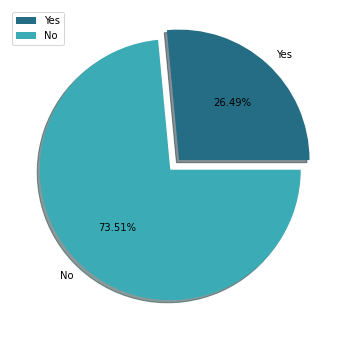

In [33]:
plt.figure(figsize= (10, 6))
data_pie  = [1857 , 5153]
labels = ["Yes", "No"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

Based on the graph that we have described above, it can be seen that the labels in the Churn column have very different proportions or can be called imbalance data. This is a warning to me because this unbalanced number of classes can give biased analysis and can also damage the performance of the model that will be created later. Therefore, at the data preprocessing stage, we will balance the labels in the Churn column.

Text(0.5, 1.0, 'no of Customers by their tenure')

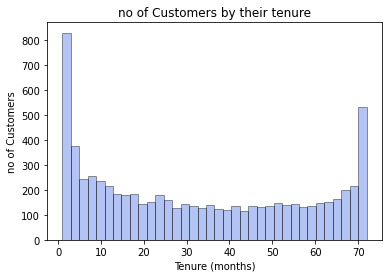

In [34]:
ax = sns.distplot(data_clean['tenure'], hist=True, kde=False, bins=int(180/5), color = 'royalblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax.set_ylabel('no of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('no of Customers by their tenure')

After looking at the above histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the company.

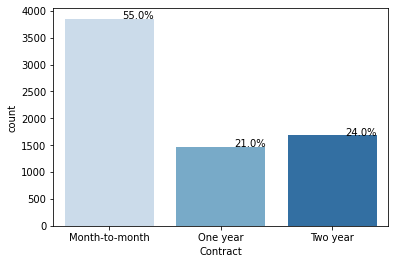

In [35]:
ax = sns.countplot(x="Contract", data=data_clean, palette="Blues")
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(data_clean))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')

55% of customers are month to month contract type and most of them have been churned. That is the reason for many customers have low tenure.

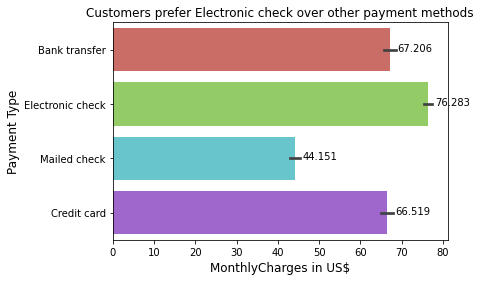

In [36]:
data_clean1 = data_clean.sort_values(by='MonthlyCharges', ascending=False)
ax = sns.barplot(x='MonthlyCharges', y='PaymentMethod', data=data_clean1, palette="hls")
ax.set_title('Customers prefer Electronic check over other payment methods')

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(25, -20), ha = 'center', va = 'center', textcoords='offset points')

plt.xlabel('MonthlyCharges in US$', fontsize = 12)
plt.ylabel('Payment Type', fontsize = 12)
warnings.filterwarnings("ignore")

Based on the visualization above, we can conclude that customers in paying monthly charges prefer to use payment methods with electronic checks compared to other methods

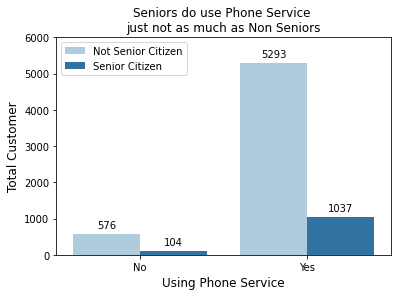

In [37]:
# Based on the total customer
seniorplot = sns.countplot(x='PhoneService', data=data_clean, hue='SeniorCitizen', palette="Paired")
seniorplot.set_title('Seniors do use Phone Service \njust not as much as Non Seniors')

for p in seniorplot.patches:
    seniorplot.annotate(int(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Change Legend Labels
legend_labels, _= seniorplot.get_legend_handles_labels()
seniorplot.legend(legend_labels, ['Not Senior Citizen','Senior Citizen'])

plt.xlabel('Using Phone Service', fontsize = 12)
plt.ylabel('Total Customer', fontsize = 12)
seniorplot.set(ylim=(0, 6000))
warnings.filterwarnings("ignore")

Based on the results above, we can see that more senior citizens use phone service than senior citizens who do not use phone service, but more non-senior citizens use phone service compared to senior citizens who use phone service.

## **VI. DATA PREPROCESSING**

### 6.1 SPLITTING THE DATA

Deciding between features and targets. It can be seen that in this case the target is in the default column and we can set it as the y variable, whereas other than the default column we can set it to the x variable.

In [38]:
# Splitting features and target
x = data_clean.drop(['Churn'], axis=1) 
y = data_clean['Churn']


# Splitting training data and test data
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, shuffle=True, test_size=0.2, stratify=y, random_state=32)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, shuffle=True, test_size=0.2, stratify=y_train_full, random_state=32)

print('Train Size : ', x_train.shape)
print('Validation Size: ', x_val.shape)
print('Test Size  : ', x_test.shape)

Train Size :  (4486, 19)
Validation Size:  (1122, 19)
Test Size  :  (1402, 19)


In [39]:
y_train.value_counts()

0    3297
1    1189
Name: Churn, dtype: int64

We can see from the results of the splitting above that the data that we will analyze in the future will be split into 3, namely train data, test data, and validation. This means that the data distribution is 20% for data test from the cleaned data (data_clean) so that the train data has the form of 4468 rows, for validation data has 1122 rows, and the test data has 1402 rows. For y_train it can be seen that this data is an imbalance data

In [40]:
# for EDA model creation, use dataframe stored in data_eda
data_eda = pd.concat([x_train, y_train], axis=1)
data_eda.shape

(4486, 20)

Recombining from X and Y that we have separated, but the combined ones are for training data only. The data for the test is different when the preprocessing data is derived from the training data

#### 6.1.1 NUMERICAL FEATURE

In [41]:
data_eda[num_col].head()

,tenure,MonthlyCharges,TotalCharges
4586,72,118.75,8672.45
6464,50,70.35,3454.60
3595,2,70.20,115.95
3649,71,25.35,1847.55
1140,13,88.95,1161.75


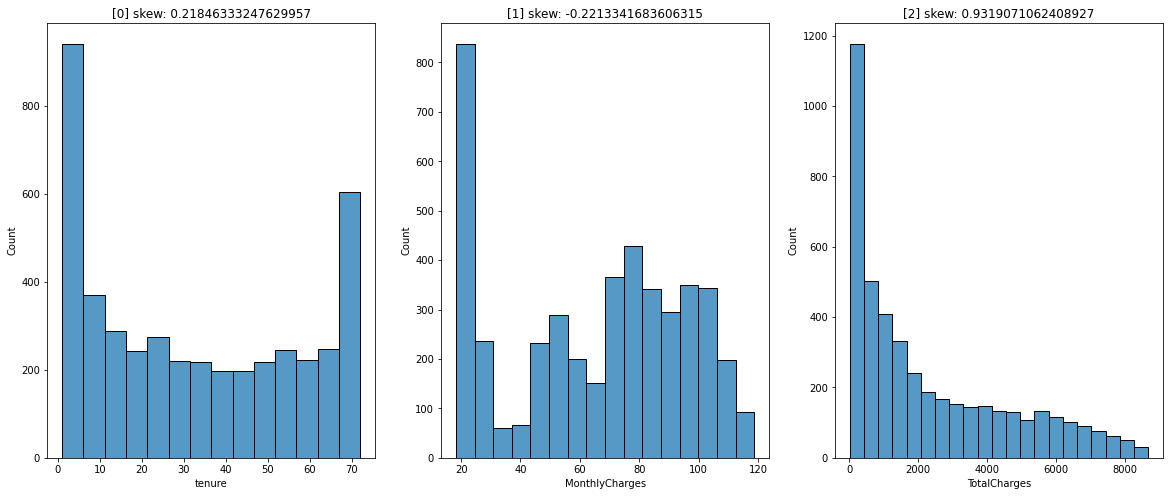

In [42]:
fig, ax = plt.subplots(ncols=3, figsize=[20,8])
ax = ax.flatten()

for idx, col in enumerate(data_eda[num_col]):
    sns.histplot(data_eda[num_col][col], ax=ax[idx])
    ax[idx].set_title(f'{[idx]} skew: {data_eda[num_col][col].skew()}')

In [43]:
def outlier_analysis(data_eda,col):
  skewness = data_eda[num_col][col].skew()
  if skewness>=-0.5 or skewness<=0.5:
    upper = data_eda[num_col][col].mean() + 3*data_eda[num_col][col].std()
    lower = data_eda[num_col][col].mean() - 3*data_eda[num_col][col].std()
  else:
    Q1 = data_eda[num_col][col].quantile(0.25)
    Q3 = data_eda[num_col][col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + (1.5*IQR)
    lower = Q3 - (1.5*IQR)
  
  no_outliers = data_eda[num_col][(data_eda[num_col][col]>=lower) & (data_eda[num_col][col]<=upper)]
  outliers = data_eda[num_col][(data_eda[num_col][col]<lower) | (data_eda[num_col][col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/data_eda.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(data_eda[num_col].columns):
  outlier_analysis(data_eda[num_col],i)

percentage outlier from tenure : 0.0 %
percentage outlier from MonthlyCharges : 0.0 %
percentage outlier from TotalCharges : 0.0 %


Based on the analysis above, we can see that each column of the numeric feature on Tenure and MonthlyCharges has a normal distribution, TotalCharges has a right skew distribution. If we look at the percentage of outliers from each of these columns that all of these columns have 0% outliers which means there are no outliers in the numeric features so we don't need outlier handling in this preprocessed data

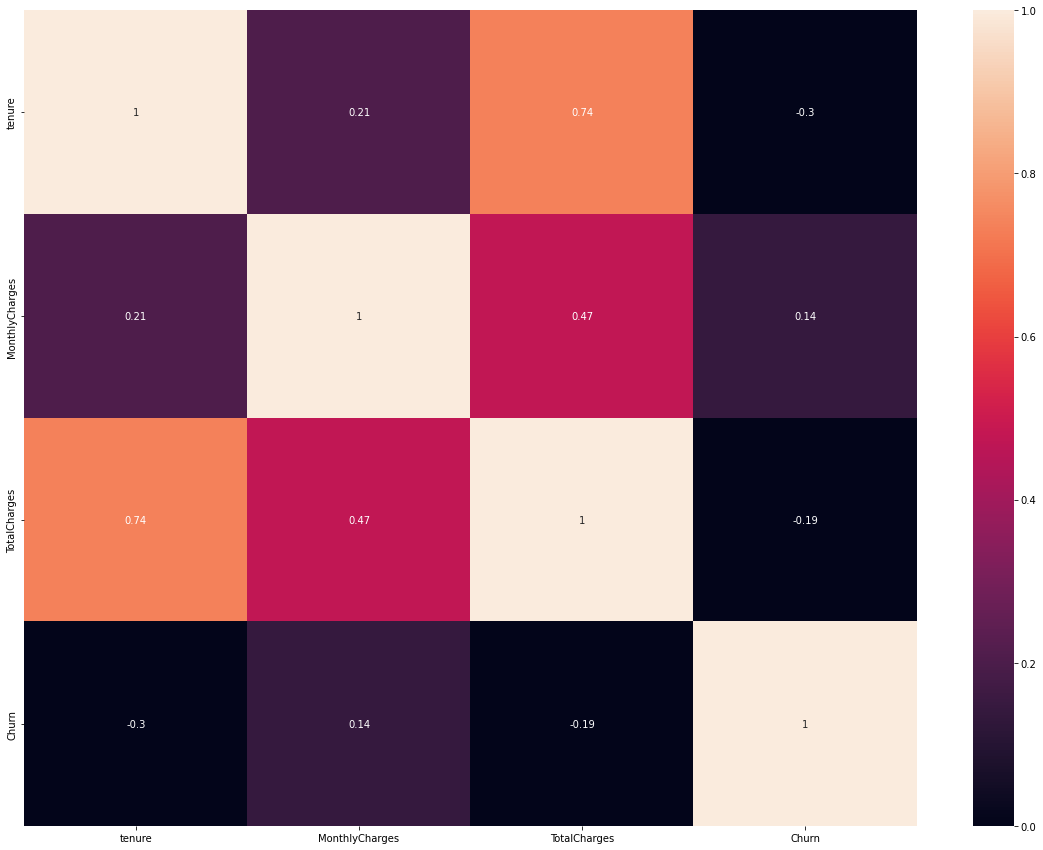

In [44]:
fig,ax = plt.subplots(figsize=[20,15])

corr = data_eda[num_col + ['Churn']].corr(method='kendall')

ax = sns.heatmap(corr,annot=True, vmin=0, vmax=1)
plt.show()

Based on the results of the correlation heatmap above, it can be seen that the three features in this numerical have a high coefficient value to the target however we will be using are tenure and MonthlyCharges. Total Charges will be removed because it works similarly with monthly charges and tenure. In addition, it is suspected that TotalCharges is the sum of the multiplication results between the tenor and MonthlyCharges. So We think the more influential features are `tenure` and also `MonthlyCharges`.

In [45]:
num_selection = ['tenure', 'MonthlyCharges']
data_eda[num_selection].head()

,tenure,MonthlyCharges
4586,72,118.75
6464,50,70.35
3595,2,70.20
3649,71,25.35
1140,13,88.95


In [46]:
data_eda[num_selection].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,4486.0,32.614133,24.585714,1.00,9.0000,30.0,56.00,72.00
MonthlyCharges,4486.0,65.148049,30.378927,18.25,35.7625,70.6,90.35,118.75


**SCALING FEATURES NUMERIC**

In [47]:
norm = 0
nonorm = 0
for col in data_eda[['tenure', 'MonthlyCharges']]:
  if data_eda[col].skew() >=-0.5 and data_eda[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

StandardScaler()

In [48]:
# numerical scaling
num_col_scalling = ['tenure', 'MonthlyCharges']
scaler = StandardScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(data_eda[num_col_scalling]))
num_scaled.columns = num_col_scalling

data_eda.drop(num_col_scalling, axis=1, inplace=True)
data_eda = pd.concat([data_eda.reset_index(drop=True), num_scaled], axis=1)

data_eda_num = data_eda[['tenure', 'MonthlyCharges']]
data_eda_num.head()

,tenure,MonthlyCharges
0,1.602160,1.764642
1,0.707232,0.171255
2,-1.245339,0.166316
3,1.561482,-1.310201
4,-0.797875,0.783589


#### 6.1.2 CATEGORICAL FEATURE

After we have made feature selection for numeric data, we will focus on categorical data preprocessing

In [49]:
chi_list = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
 
for col in chi_list:
    contingency_table = pd.crosstab(data_eda[col], data_eda["Churn"])
    stat, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(col)
    print('p=%.3f' % (p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')
    print('\n')

SeniorCitizen
p=0.000
Probably dependent


gender
p=0.290
Probably independent


Partner
p=0.000
Probably dependent


Dependents
p=0.000
Probably dependent


PhoneService
p=0.380
Probably independent


MultipleLines
p=0.001
Probably dependent


InternetService
p=0.000
Probably dependent


OnlineSecurity
p=0.000
Probably dependent


OnlineBackup
p=0.000
Probably dependent


DeviceProtection
p=0.000
Probably dependent


TechSupport
p=0.000
Probably dependent


StreamingTV
p=0.001
Probably dependent


StreamingMovies
p=0.000
Probably dependent


Contract
p=0.000
Probably dependent


PaperlessBilling
p=0.000
Probably dependent


PaymentMethod
p=0.000
Probably dependent




By checking correlation using a chi-squared test it is found that there is a correlation between churn and all categorical columns with the exception of gender and phone service. So we decided to remove the gender and phone service features from the data to be analyzed.

In [50]:
cat_selection = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
data_eda[cat_selection].head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,No,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer
1,Yes,No,No,Yes,DSL,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer
2,Yes,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer
3,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Credit card
4,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card


In this categorical data We will do the encoding by means of OneHotEncoder and OrdinalEncoder

In [51]:
# Categorical overview
for i in data_eda[cat_selection].columns.tolist():
    print(f'num of unique label in {i}: ', len(data_eda[cat_selection][i].unique()))

num of unique label in SeniorCitizen:  2
num of unique label in Partner:  2
num of unique label in Dependents:  2
num of unique label in MultipleLines:  2
num of unique label in InternetService:  3
num of unique label in OnlineSecurity:  2
num of unique label in OnlineBackup:  2
num of unique label in DeviceProtection:  2
num of unique label in TechSupport:  2
num of unique label in StreamingTV:  2
num of unique label in StreamingMovies:  2
num of unique label in Contract:  3
num of unique label in PaperlessBilling:  2
num of unique label in PaymentMethod:  4


For binary categorical features it will be done using OrdinalEncoder, apart from that it will be done using OneHotEncoder

In [52]:
for i in data_eda[cat_selection].columns.tolist():
    print(i, '\n')
    print(data_eda[cat_selection][i].value_counts())
    print('-'*30)

SeniorCitizen 

No     3768
Yes     718
Name: SeniorCitizen, dtype: int64
------------------------------
Partner 

No     2319
Yes    2167
Name: Partner, dtype: int64
------------------------------
Dependents 

No     3128
Yes    1358
Name: Dependents, dtype: int64
------------------------------
MultipleLines 

No     2583
Yes    1903
Name: MultipleLines, dtype: int64
------------------------------
InternetService 

Fiber optic    2002
DSL            1509
No              975
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity 

No     3170
Yes    1316
Name: OnlineSecurity, dtype: int64
------------------------------
OnlineBackup 

No     2928
Yes    1558
Name: OnlineBackup, dtype: int64
------------------------------
DeviceProtection 

No     2914
Yes    1572
Name: DeviceProtection, dtype: int64
------------------------------
TechSupport 

No     3171
Yes    1315
Name: TechSupport, dtype: int64
------------------------------
StreamingTV 

No     2758
Yes  

Ordinal Encoder for `SeniorCitizen`, `Partner`, `Dependents`, `PaperlessBilling`, `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies` feature

In [53]:
SeniorCitizen = ['No', 'Yes']
Partner = ['No', 'Yes']
Dependents = ['No', 'Yes']
PaperlessBilling = ['No', 'Yes']
MultipleLines = ['No', 'Yes']
OnlineSecurity = ['No', 'Yes']
OnlineBackup = ['No', 'Yes']
DeviceProtection = ['No', 'Yes']
TechSupport = ['No', 'Yes']
StreamingTV = ['No', 'Yes']
StreamingMovies = ['No', 'Yes']

ord_enc = OrdinalEncoder(categories=[SeniorCitizen, Partner, Dependents, PaperlessBilling, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies])
cat_ord = pd.DataFrame(ord_enc.fit_transform(data_eda[['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]))

cat_ord.columns = ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
review = pd.concat([data_eda[['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].reset_index(drop=True), cat_ord], axis=1)

review.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Partner,Dependents,PaperlessBilling,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2,Yes,No,No,Yes,No,No,No,No,No,No,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,No,Yes,Yes,No,Yes,No,No,No,No,No,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


One Hot Encoder for `InternetService`, `Contract`, and `PaymentMethod` feature

In [54]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(data_eda[['InternetService', 'Contract', 'PaymentMethod']]))
cat_ohe.columns = ohe_enc.get_feature_names(['InternetService', 'Contract', 'PaymentMethod'])

cat_ohe.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [55]:
data_eda = pd.concat([data_eda_num.reset_index(drop=True), cat_ord, cat_ohe, data_eda['Churn'].reset_index(drop=True)], axis=1)
data_eda.head()

,tenure,MonthlyCharges,SeniorCitizen,Partner,Dependents,PaperlessBilling,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1.602160,1.764642,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,0.707232,0.171255,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,-1.245339,0.166316,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,1.561482,-1.310201,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,-0.797875,0.783589,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


In [56]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4486 entries, 0 to 4485
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          4486 non-null   float64
 1   MonthlyCharges                  4486 non-null   float64
 2   SeniorCitizen                   4486 non-null   float64
 3   Partner                         4486 non-null   float64
 4   Dependents                      4486 non-null   float64
 5   PaperlessBilling                4486 non-null   float64
 6   MultipleLines                   4486 non-null   float64
 7   OnlineSecurity                  4486 non-null   float64
 8   OnlineBackup                    4486 non-null   float64
 9   DeviceProtection                4486 non-null   float64
 10  TechSupport                     4486 non-null   float64
 11  StreamingTV                     4486 non-null   float64
 12  StreamingMovies                 44

Overall what we did to train data preprocess:
- For Numeric:
1. Scaling using Standard Scaler
2. Feature selection `tenure`, `MonthlyCharges`

- For categoric:
1. Feature selection `SeniorCitizen`, `Partner`, `Dependents`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`,
 `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`
2. Ordinal encoding for SeniorCitizen, Partner, Dependents, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling
3. OHE for InternetService, Contract, PaymentMethod


#### **6.1.3 PREPROCESS**

#### 6.1.3.1 Without Imbalance Handling

In [57]:
num_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

num_tr = num_pipeline.fit_transform(x_train[['tenure', 'MonthlyCharges']])
num_tr

array([[ 1.60216044,  1.76464186],
       [ 0.70723207,  0.17125458],
       [-1.2453389 ,  0.1663164 ],
       ...,
       [-1.20466034, -1.48632908],
       [ 0.7885892 , -1.48303696],
       [ 0.54451783, -0.35548501]])

In [58]:
SeniorCitizen = ['No', 'Yes']
Partner = ['No', 'Yes']
Dependents = ['No', 'Yes']
PaperlessBilling = ['No', 'Yes']
MultipleLines = ['No', 'Yes']
OnlineSecurity = ['No', 'Yes']
OnlineBackup = ['No', 'Yes']
DeviceProtection = ['No', 'Yes']
TechSupport = ['No', 'Yes']
StreamingTV = ['No', 'Yes']
StreamingMovies = ['No', 'Yes']

cat1_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[SeniorCitizen, Partner, Dependents, PaperlessBilling, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies]))
    ])

cat1_tr = cat1_pipeline.fit_transform(x_train[['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']])
cat1_tr

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [59]:
cat2_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

cat2_tr = cat2_pipeline.fit_transform(x_train[['InternetService', 'Contract', 'PaymentMethod']])
cat2_tr

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [60]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['tenure', 'MonthlyCharges']),
        ("cat_ord", cat1_pipeline, ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']),
        ("cat_ohe", cat2_pipeline, ['InternetService', 'Contract', 'PaymentMethod'])
    ])

train_tr = full_pipeline.fit_transform(x_train)
train_tr

array([[ 1.60216044,  1.76464186,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70723207,  0.17125458,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.2453389 ,  0.1663164 ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.20466034, -1.48632908,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.7885892 , -1.48303696,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54451783, -0.35548501,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [61]:
train_manual = np.array(data_eda[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'InternetService_DSL',
 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer', 'PaymentMethod_Credit card', 'PaymentMethod_Electronic check','PaymentMethod_Mailed check'
 ]])
 
np.allclose(train_tr, train_manual)

True

Based on the analysis above, we can see the proof of the process between the manual and pipeline methods, from the results above it says 'True' which means it is appropriate and there is no difference between the two preprocessing methods.

In [62]:
num = ['tenure', 'MonthlyCharges']
cat = ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'InternetService_DSL',
'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer', 'PaymentMethod_Credit card', 'PaymentMethod_Electronic check','PaymentMethod_Mailed check']

no_imb = pd.DataFrame(full_pipeline.fit_transform(x_train), columns= num +cat)

pd.concat([no_imb, y_train.reset_index(drop=True)], axis=1)

,tenure,MonthlyCharges,SeniorCitizen,Partner,Dependents,PaperlessBilling,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1.602160,1.764642,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,0.707232,0.171255,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,-1.245339,0.166316,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,1.561482,-1.310201,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,-0.797875,0.783589,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,1.480125,1.356419,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4482,1.358089,0.327630,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4483,-1.204660,-1.486329,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4484,0.788589,-1.483037,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0


In [63]:
data_eda['Churn'].value_counts()

0    3297
1    1189
Name: Churn, dtype: int64

We need to know about this process with imbalanced data, so we will compare the model prediction results on imbalanced data with handling imbalance

#### 6.1.3.2 With Imbalance Handling

In [64]:
# imbalance pipeline
final = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sampl', SMOTENC([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22], sampling_strategy=1.0, random_state=0))
])

final

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               '...
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['InternetService',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22],
                         random_state=0, sampling_strategy=1.0))])

In [65]:
X_resampled, y_resampled = final.fit_resample(x_train, y_train)

resampled = pd.concat([pd.DataFrame(X_resampled, columns=num+cat), pd.DataFrame(y_resampled)], axis=1)
resampled

,tenure,MonthlyCharges,SeniorCitizen,Partner,Dependents,PaperlessBilling,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1.602160,1.764642,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,0.707232,0.171255,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,-1.245339,0.166316,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,1.561482,-1.310201,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,-0.797875,0.783589,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6589,-1.204660,0.721097,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
6590,0.351008,-0.310918,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6591,-1.286017,-0.625997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
6592,-1.232320,-1.272138,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [66]:
resampled.Churn.value_counts()

0    3297
1    3297
Name: Churn, dtype: int64

Based on the process above, we can see that in this data imbalance handling has been carried out using the SMOTENC method so that the samples between category 0 and 1 are balanced.

In [67]:
test_tr = full_pipeline.transform(x_test)
test_tr

array([[ 1.48012475, -0.37852987,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.20466034,  0.00335634,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.21908933,  0.97947065,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66655351,  0.21899036,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.22837485,  0.03298544,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.99198201,  1.16712163,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [68]:
val_tr = full_pipeline.transform(x_val)
val_tr

array([[-0.96058897, -1.49126727,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.35041054, -0.50856871,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.26905341,  0.89716759,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.39876763, -1.32666114,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.14701773, -1.50114363,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.07333913,  0.80992634,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

## **VII. DEEP LEARNING MODELING**


There will be 2 methods that we will try to build here, namely Sequential API and Functional API. We will try to build the baseline model first and then improve the model with hyperparameter tuning. And then lastly, we will use the best model to be tested on test data.

### 7.1 PIPELINE TENSORFLOW

Here I will first make the pipeline for the baseline model

In [69]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_resampled, y_resampled))
train_dataset = train_dataset.shuffle(buffer_size=6600).batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((val_tr, y_val))
val_dataset = val_dataset.batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((test_tr, y_test))
test_dataset = test_dataset.batch(64)

### 7.2 SEQUENTIAL MODEL

#### 7.2.1 SEQUENTIAL MODEL DEFINITION

In [70]:
# defining neuron ammount
alp = 10
inp = X_resampled.shape[1]
out = 1
hid = int(len(X_resampled)/(alp*(inp+out)))
print(f'Jumlah Neuron pada Hidden Layer: {hid}')

Jumlah Neuron pada Hidden Layer: 27


In [71]:
# Sequential Model Architecture
model_seq = tf.keras.models.Sequential()

# Input layer
model_seq.add(tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', input_shape=(inp,))) 

# Hidden layer
model_seq.add(tf.keras.layers.Dense(hid, activation='relu'))

# Output layer  
model_seq.add(tf.keras.layers.Dense(out, activation='sigmoid'))

# Set the optimizer
opt = tf.keras.optimizers.Adam()

# Compiling the model
model_seq.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [72]:
# Model summary
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                552       
                                                                 
 dense_1 (Dense)             (None, 27)                648       
                                                                 
 dense_2 (Dense)             (None, 1)                 28        
                                                                 
Total params: 1,228
Trainable params: 1,228
Non-trainable params: 0
_________________________________________________________________


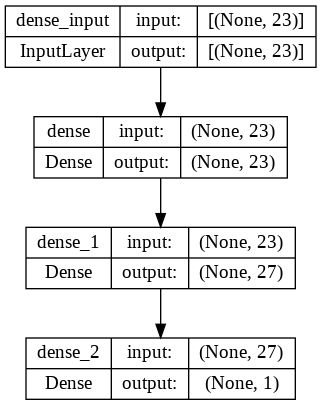

In [73]:
# Model plotting
tf.keras.utils.plot_model(model_seq, show_shapes=True, show_layer_names=True)

#### 7.2.2 SEQUENTIAL MODEL TRAINING

In [74]:
#  Training the model
history_seq=model_seq.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
104/104 [==============================] - 2s 8ms/step - loss: 0.5848 - accuracy: 0.6917 - val_loss: 0.5129 - val_accuracy: 0.7549
Epoch 2/50
104/104 [==============================] - 1s 5ms/step - loss: 0.4767 - accuracy: 0.7806 - val_loss: 0.4723 - val_accuracy: 0.7701
Epoch 3/50
104/104 [==============================] - 1s 5ms/step - loss: 0.4654 - accuracy: 0.7790 - val_loss: 0.4783 - val_accuracy: 0.7594
Epoch 4/50
104/104 [==============================] - 1s 6ms/step - loss: 0.4596 - accuracy: 0.7863 - val_loss: 0.4786 - val_accuracy: 0.7629
Epoch 5/50
104/104 [==============================] - 1s 6ms/step - loss: 0.4532 - accuracy: 0.7931 - val_loss: 0.4769 - val_accuracy: 0.7602
Epoch 6/50
104/104 [==============================] - 1s 6ms/step - loss: 0.4509 - accuracy: 0.7897 - val_loss: 0.4733 - val_accuracy: 0.7594
Epoch 7/50
104/104 [==============================] - 1s 5ms/step - loss: 0.4473 - accuracy: 0.7972 - val_loss: 0.4662 - val_accuracy: 0.7638
Epoch 

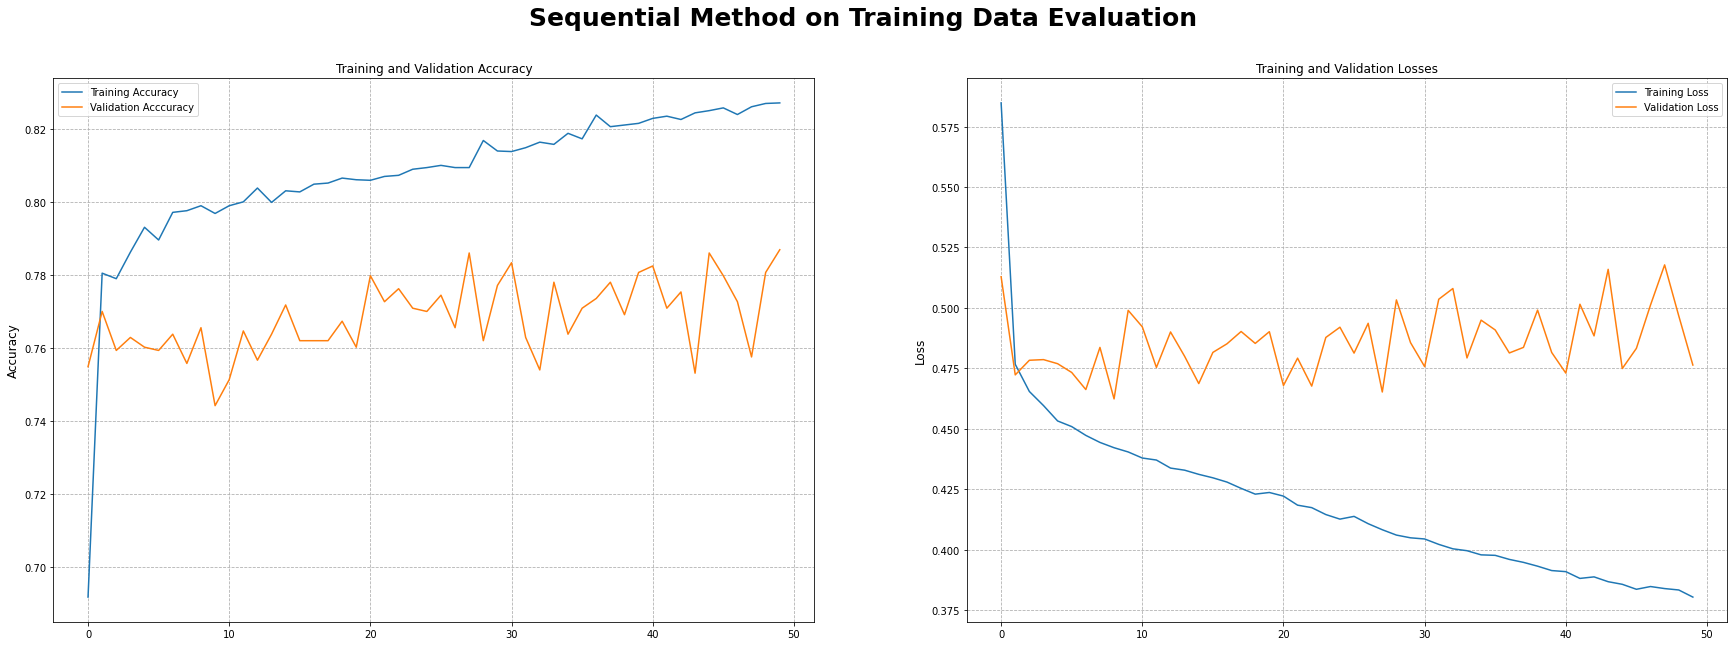

In [75]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seq.history['accuracy'],label="Training Accuracy")
plt.plot(history_seq.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq.history['loss'], label="Training Loss")
plt.plot(history_seq.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Based on the graph of 'Sequential Method on Training Data Evaluation' with epoch value = 50, it can be seen that there is still overfitting of the validated training accuracy results to the validation data. And on the graph it can be seen that the gradient is still exploding.

#### 7.2.3 SEQUENTIAL MODEL IMPROVEMENT

In [76]:
# Sequential Model Architecture
Imp_model_seq = tf.keras.models.Sequential()

# Input layer
Imp_model_seq.add(tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', input_shape=(inp,))) 

# Hidden layer
Imp_model_seq.add(tf.keras.layers.Dense(hid, activation='relu'))

# Output layer  
Imp_model_seq.add(tf.keras.layers.Dense(out, activation='sigmoid'))

# Set the optimizer
opt = tf.keras.optimizers.Adam()

# Compiling the model
Imp_model_seq.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [77]:
Imp_model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 23)                552       
                                                                 
 dense_4 (Dense)             (None, 27)                648       
                                                                 
 dense_5 (Dense)             (None, 1)                 28        
                                                                 
Total params: 1,228
Trainable params: 1,228
Non-trainable params: 0
_________________________________________________________________


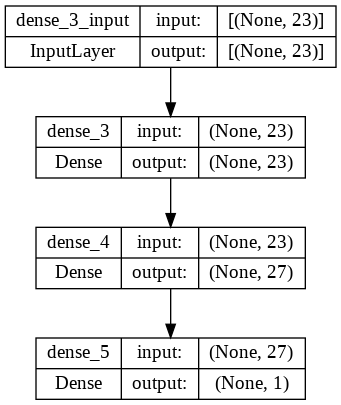

In [78]:
# Model plotting
tf.keras.utils.plot_model(Imp_model_seq, show_shapes=True, show_layer_names=True)

In [79]:
#  Training the model
Imp_model_seq.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics='accuracy')
ImpSeq_history = Imp_model_seq.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
104/104 [==============================] - 1s 4ms/step - loss: 0.7019 - accuracy: 0.5067 - val_loss: 0.6479 - val_accuracy: 0.6515
Epoch 2/50
104/104 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.6850 - val_loss: 0.6240 - val_accuracy: 0.7121
Epoch 3/50
104/104 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7348 - val_loss: 0.5959 - val_accuracy: 0.7255
Epoch 4/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7507 - val_loss: 0.5708 - val_accuracy: 0.7326
Epoch 5/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7552 - val_loss: 0.5454 - val_accuracy: 0.7335
Epoch 6/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7610 - val_loss: 0.5274 - val_accuracy: 0.7424
Epoch 7/50
104/104 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.7654 - val_loss: 0.5116 - val_accuracy: 0.7522
Epoch 

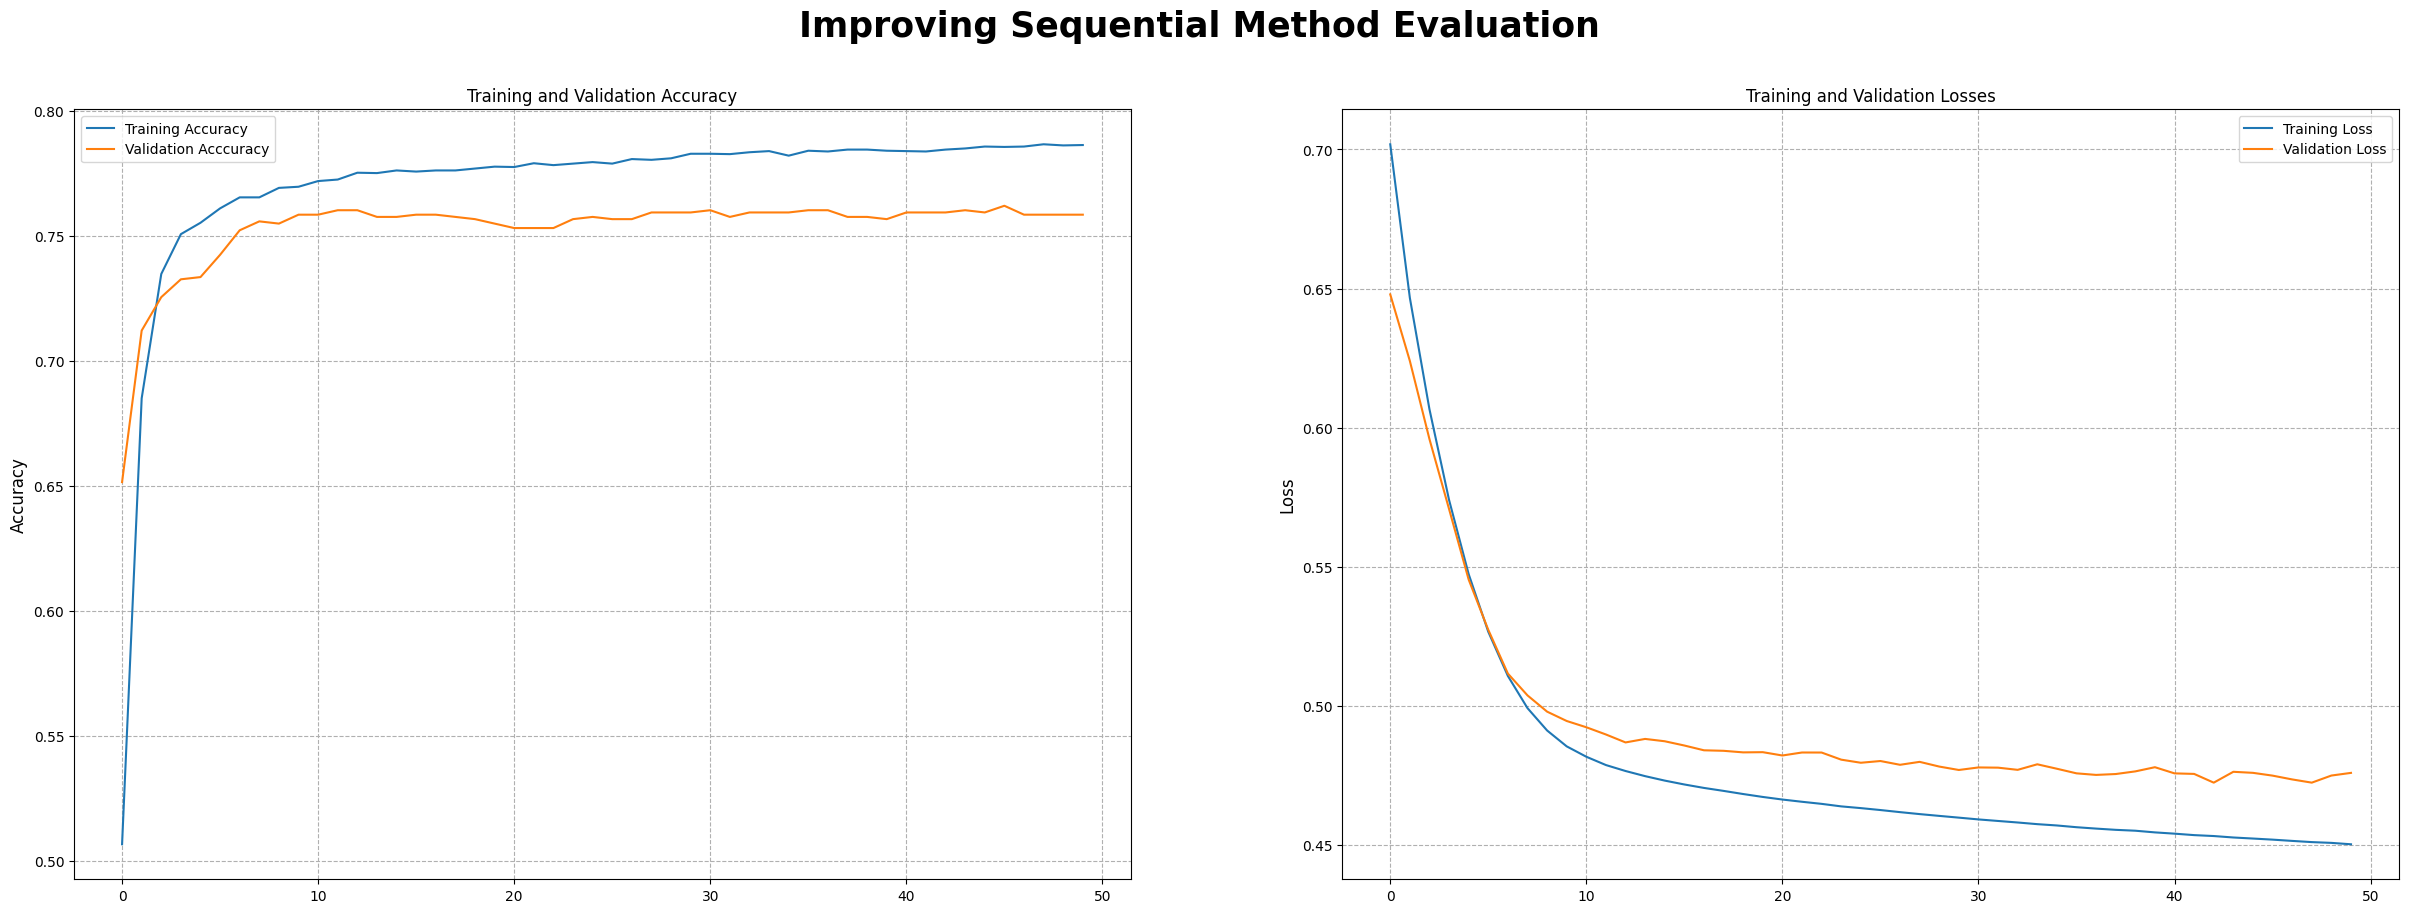

In [80]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Improving Sequential Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(ImpSeq_history.history['accuracy'],label="Training Accuracy")
plt.plot(ImpSeq_history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(ImpSeq_history.history['loss'], label="Training Loss")
plt.plot(ImpSeq_history.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

After making improvements to the sequential method, it can be seen that the sequential model has increased significantly. The accuracy of training and validation is close to its value although there is still a difference of around 2% - 3%. Likewise with the loss value in training and validation in the sequential method. It can be seen that in the graph on the right, the loss accuracy value has not decreased since about epoch = 10.

In [81]:
# Freezing the final model
Imp_model_seq.trainable = False

### 7.3 FUNCTIONAL MODEL

#### 7.3.1 FUNCTIONAL MODEL DEFINITION

In [82]:
# Setting the neuron
n_neuronFunc = (22, 10)
n_feature = X_resampled.shape[1]

# Input layer
data_in = Input(shape=(n_feature, )) # INPUT LAYER
hidden_n = data_in

# Hidden layer
for n in n_neuronFunc: # HIDDEN LAYER
    hidden_n = Dense(n, activation='relu')(hidden_n)
data_out = Dense(1, activation='sigmoid')(hidden_n) 

# Output layer
model_func = Model(inputs=data_in, outputs=data_out)

# Compile Model_Functional
model_func.compile(
    loss='binary_crossentropy',
    optimizer=opt, 
    metrics=['accuracy']
)

In [83]:
# Model summary
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 dense_6 (Dense)             (None, 22)                528       
                                                                 
 dense_7 (Dense)             (None, 10)                230       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


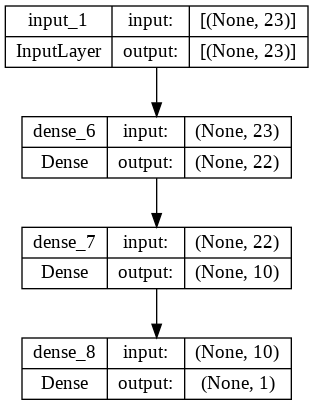

In [84]:
# Model plotting
tf.keras.utils.plot_model(model_func, show_shapes = True)

#### 7.3.2 FUNCTIONAL MODEL TRAINING

In [85]:
# Training the model
historyFunc = model_func.fit(train_dataset, validation_data = (val_dataset), epochs = 50)

Epoch 1/50
104/104 [==============================] - 1s 4ms/step - loss: 0.5892 - accuracy: 0.6809 - val_loss: 0.5257 - val_accuracy: 0.7380
Epoch 2/50
104/104 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7698 - val_loss: 0.4826 - val_accuracy: 0.7540
Epoch 3/50
104/104 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.7777 - val_loss: 0.4788 - val_accuracy: 0.7558
Epoch 4/50
104/104 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7793 - val_loss: 0.4879 - val_accuracy: 0.7549
Epoch 5/50
104/104 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7843 - val_loss: 0.4765 - val_accuracy: 0.7558
Epoch 6/50
104/104 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7854 - val_loss: 0.4751 - val_accuracy: 0.7531
Epoch 7/50
104/104 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7854 - val_loss: 0.4684 - val_accuracy: 0.7576
Epoch 

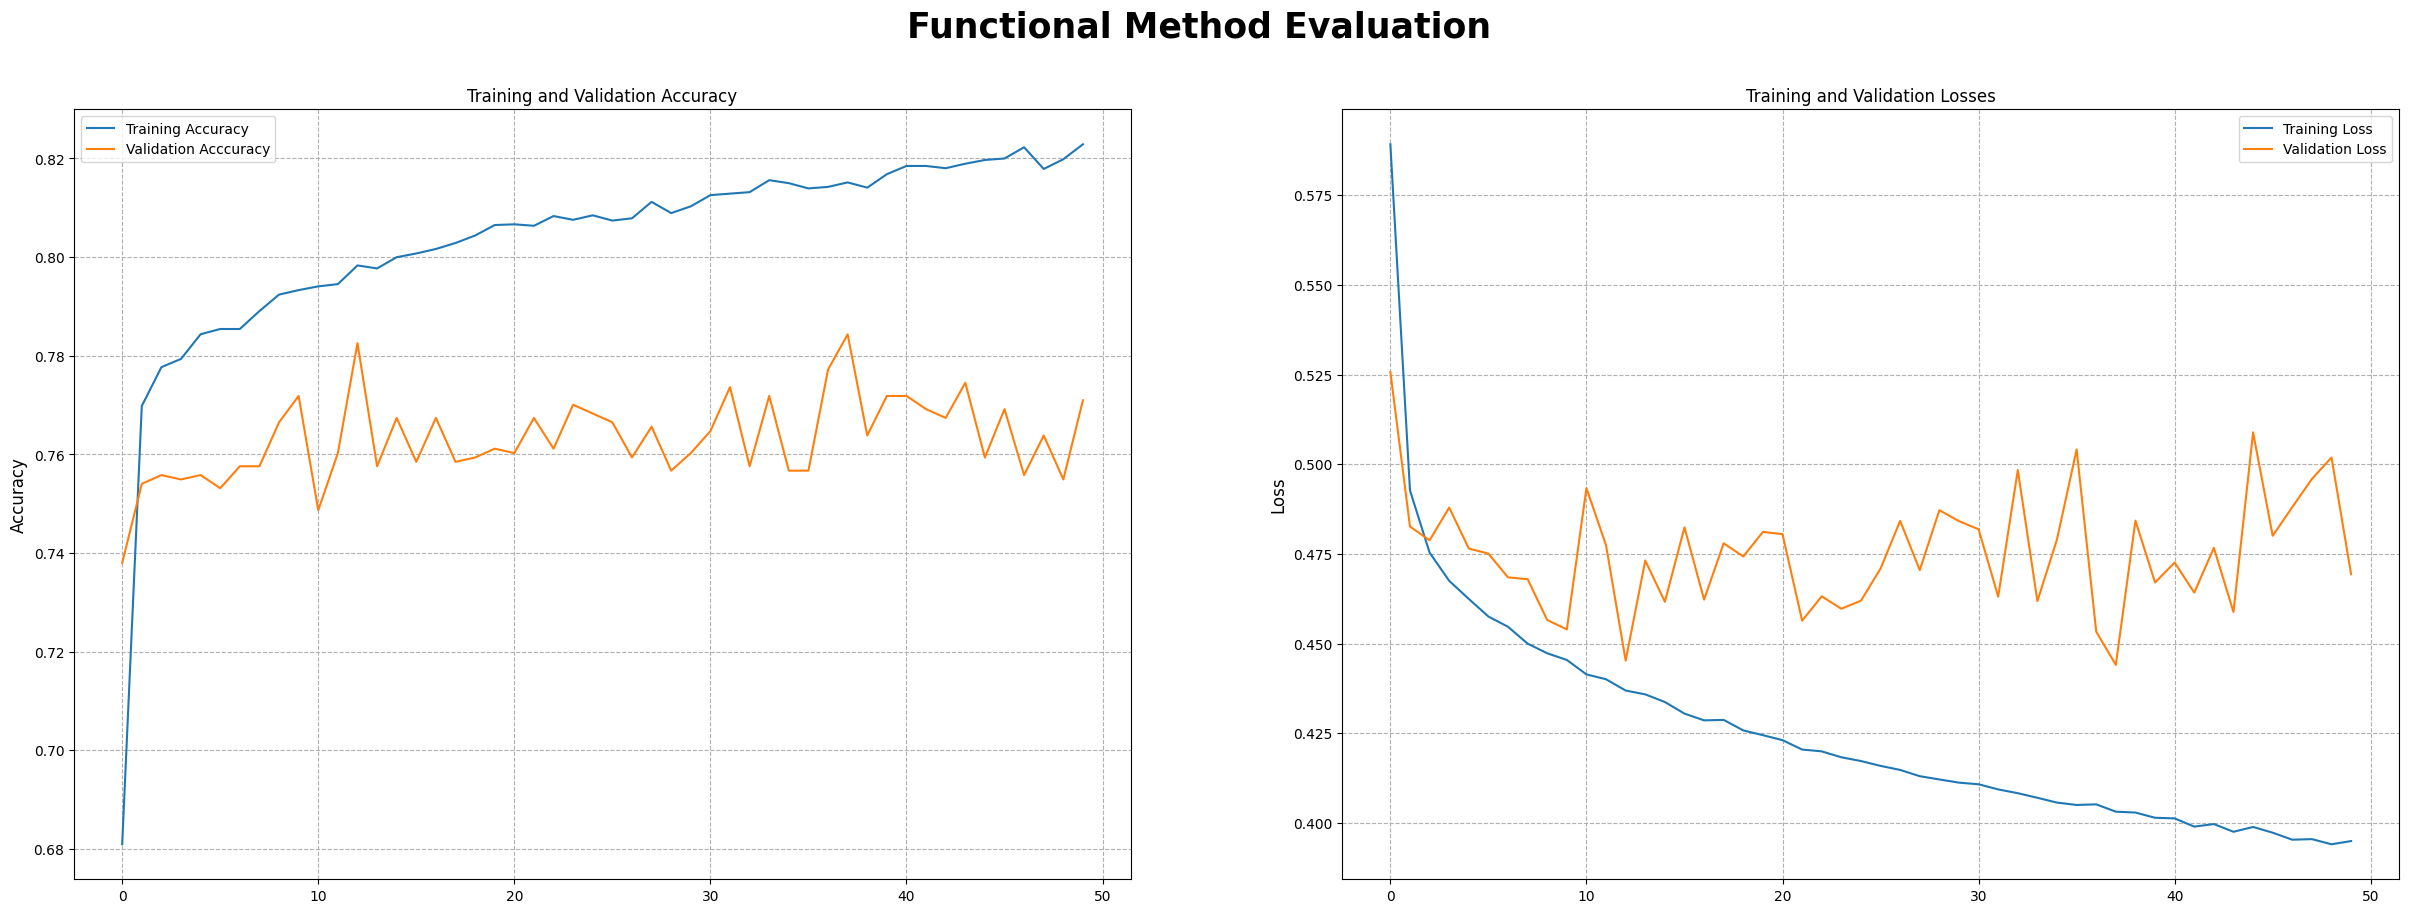

In [86]:
# Loss and accuracy model plotting
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
fig.suptitle('Functional Method Evaluation', fontsize = 25, weight = 'bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize = 12)
plt.plot(historyFunc.history['accuracy'], label = "Training Accuracy")
plt.plot(historyFunc.history['val_accuracy'], label = "Validation Acccuracy")
plt.ylabel("Accuracy", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize = 12)
plt.plot(historyFunc.history['loss'], label = "Training Loss")
plt.plot(historyFunc.history['val_loss'], label = "Validation Loss")
plt.ylabel("Loss", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.style.use('default')
plt.show()

It can be seen in the results of the baseline functional model graph that has been made, training and validation accuracy are still very different, and also experiencing overfitting. Then, the loss accuracy of validation increases as the epoch increases.

#### 7.3.3 FUNCTIONAL MODEL IMPROVEMENT

In [87]:
n_neuronfunc = (25, 10)   

# Arsitektur Model_Functional
data_in = Input(shape=(n_feature, ))                # Input Layer

hidden_n = data_in
for n in n_neuronfunc:                              # Hidden Layer
    hidden_n = Dense(n, activation='relu')(hidden_n)

data_out = Dense(1, activation='sigmoid')(hidden_n) # Output Layer

Imp_model_func = Model(inputs=data_in, outputs=data_out)

In [88]:
Imp_model_func.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 23)]              0         
                                                                 
 dense_9 (Dense)             (None, 25)                600       
                                                                 
 dense_10 (Dense)            (None, 10)                260       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 871
Trainable params: 871
Non-trainable params: 0
_________________________________________________________________


In [89]:
Imp_model_func.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics='accuracy')
Imp_history_func = Imp_model_func.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
104/104 [==============================] - 1s 4ms/step - loss: 0.6950 - accuracy: 0.4956 - val_loss: 0.6748 - val_accuracy: 0.5401
Epoch 2/100
104/104 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.5760 - val_loss: 0.6543 - val_accuracy: 0.5989
Epoch 3/100
104/104 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6621 - val_loss: 0.6306 - val_accuracy: 0.6658
Epoch 4/100
104/104 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.7161 - val_loss: 0.6037 - val_accuracy: 0.7023
Epoch 5/100
104/104 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7510 - val_loss: 0.5756 - val_accuracy: 0.7228
Epoch 6/100
104/104 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.7631 - val_loss: 0.5537 - val_accuracy: 0.7299
Epoch 7/100
104/104 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.7655 - val_loss: 0.5342 - val_accuracy: 0.7380

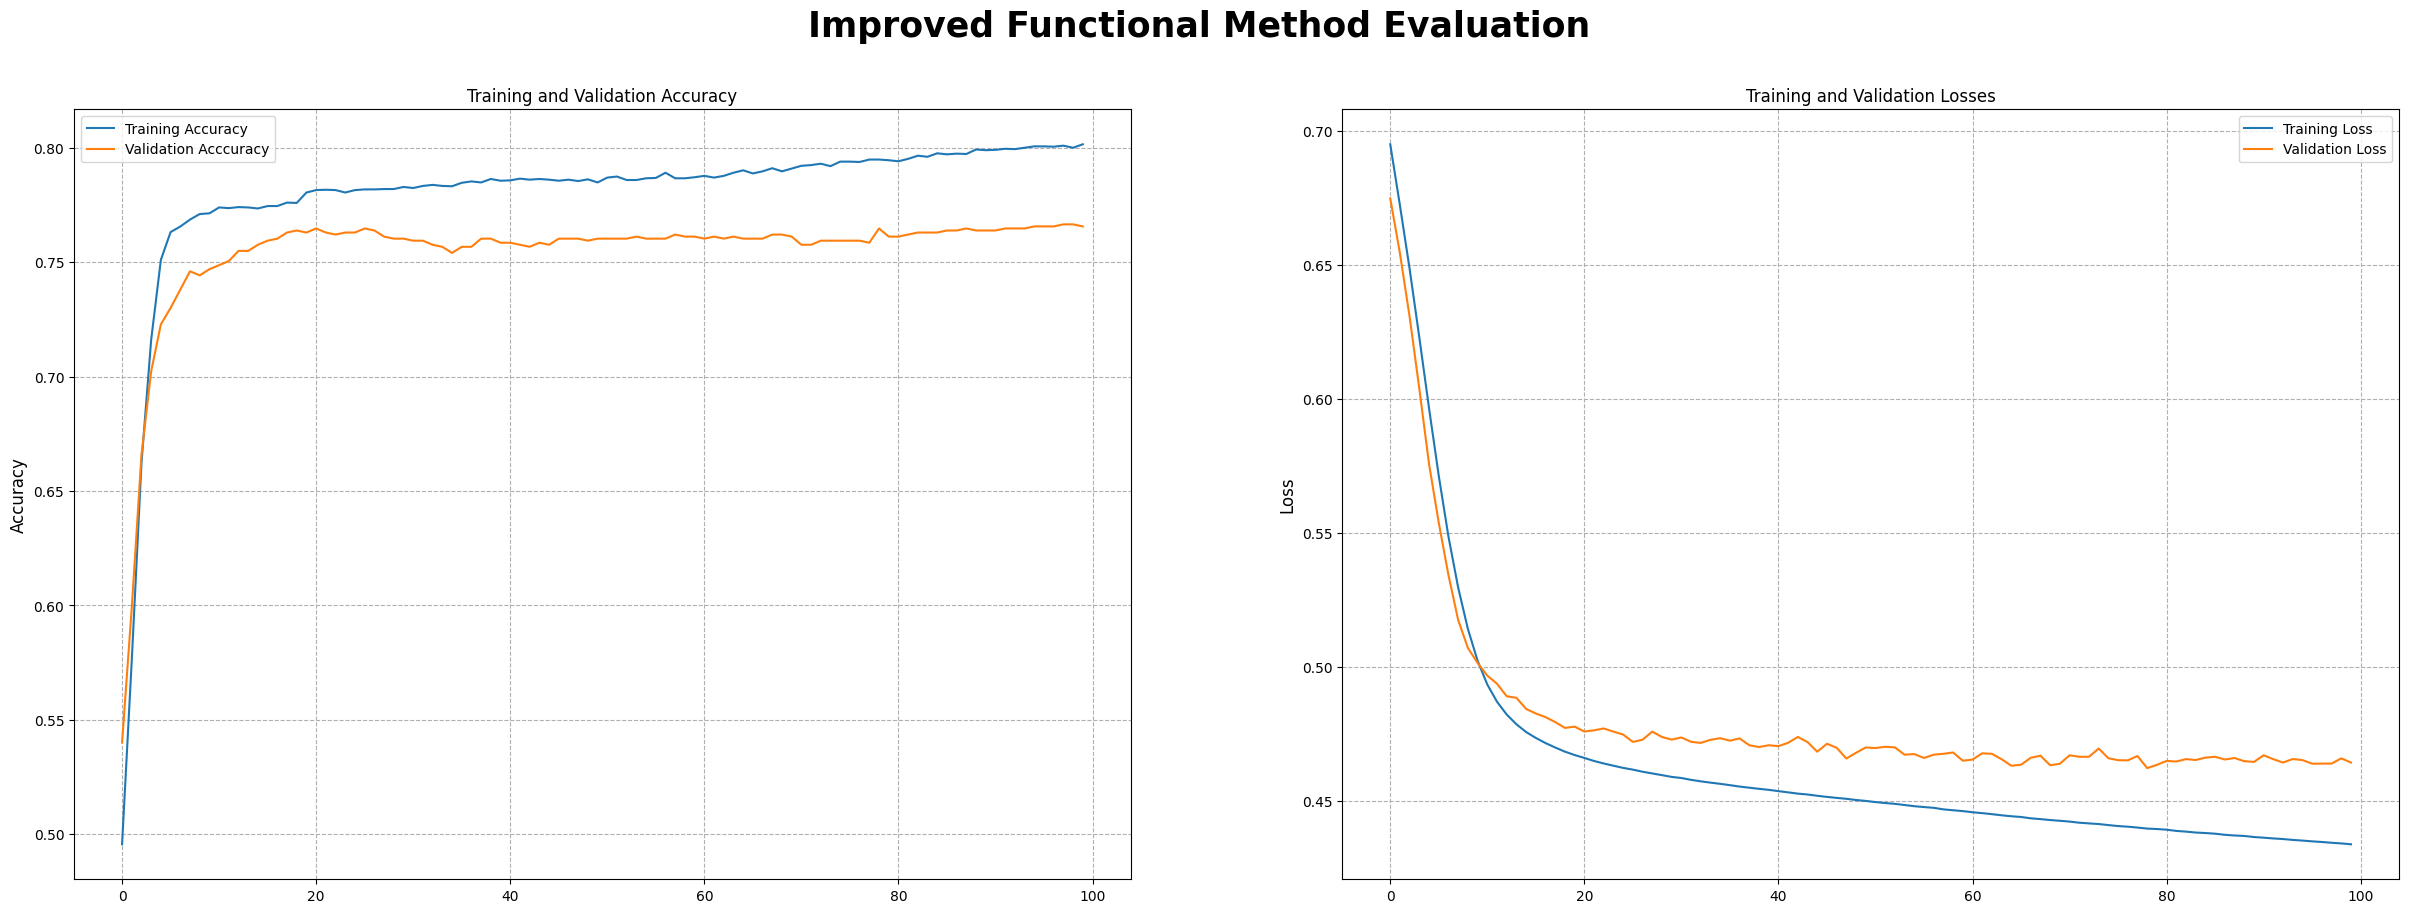

In [90]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Improved Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(Imp_history_func.history['accuracy'],label="Training Accuracy")
plt.plot(Imp_history_func.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(Imp_history_func.history['loss'], label="Training Loss")
plt.plot(Imp_history_func.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

After making improvements to the functional model, it can be seen in the graph above, there is not much difference between training accuracy and validation. In the graph on the left, it can be seen that when epoch 20 the accuracy values between training and validation are similar. And when epoch 20 there is a decrease in validation accuracy. Then, in the graph on the right, it can be seen that the loss accuracy value for validation has not decreased since epoch = 60.

In [91]:
# Freezing the final model 
Imp_model_func.trainable = False

### 7.4 MODEL EVALUATION

#### 7.4.1 SEQUENTIAL MODEL

22/22 [==============================] - 0s 1ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1031
           1       0.48      0.86      0.61       371

    accuracy                           0.71      1402
   macro avg       0.70      0.76      0.69      1402
weighted avg       0.81      0.71      0.73      1402



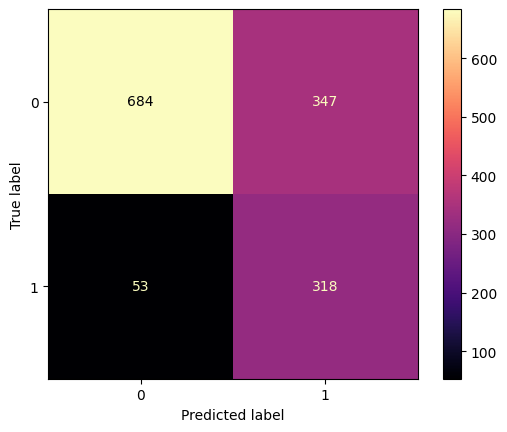

In [92]:
# predict probabilities
y_pred_seq = Imp_model_seq.predict(test_dataset)
y_pred_seq = (y_pred_seq > 0.4)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_seq, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

We want to keep our customers in our ecosystem. Why so? As explained earlier, the costs needed to find or get new customers will be higher than if we try to retain our loyal customers. Or in other words, we will cut our revenue to get new customers, whereas if we retain our loyal customers, we can get more profit if we are smart in managing marketing strategies.

If the churn customer is predicted as a non-churn customer, of course this will endanger us as marketing or the TELCO team, we will lose the customer we should retain.

Therefore, I will use the recall evaluation metric to review whether my model is considered good or not.

The interpretations that can be obtained from the classification report test data above are:

Precision: of all the people predicted to churn by the model, 48 % were correct.
Recall : of all people that is churning, the model only predicted this outcome correctly for 86% of those people.
F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the sequential API model that has been made has a score of 0.61 of 1.00. 

For confusion matrix: There are 684 data that are predicted to be NonChurn, there are 347 data of NonChurn that are predicted to be Churn. Then there are 53 data of Churn which are predicted as NonChurn and 318 data of Churn which are predicted to be correct as Churn.

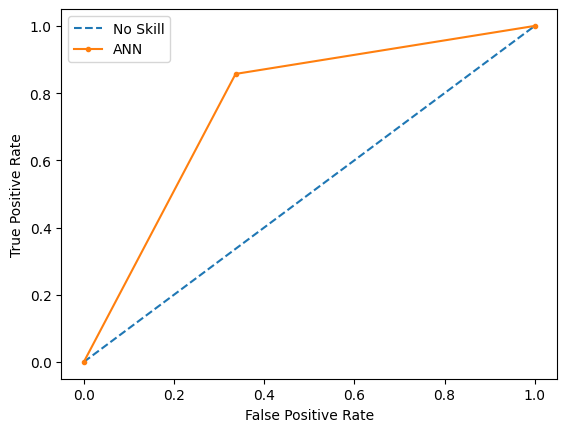

AUC score: 0.7602882083968409


In [93]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_seq)
auc = roc_auc_score(y_test, y_pred_seq)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability. In fact, it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means the model has no class separation capacity whatsoever. But in our case we tuned down the threshold to 0.4 for a better recall score. And my sequential method score is 0.76 so it is a moderately good model.

#### 7.4.2 FUNCTIONAL MODEL

22/22 [==============================] - 0s 2ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1031
           1       0.50      0.85      0.63       371

    accuracy                           0.73      1402
   macro avg       0.71      0.77      0.71      1402
weighted avg       0.81      0.73      0.75      1402



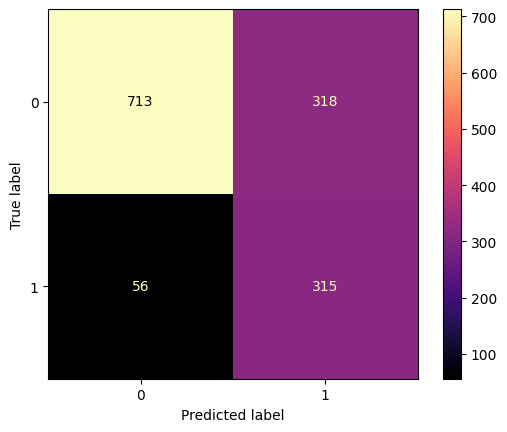

In [94]:
# predict probabilities
y_pred_func = Imp_model_func.predict(test_dataset)
y_pred_func = (y_pred_func > 0.4)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_func, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

Based on the Functional API model that has been made, the confusion matrix obtained says that there are 713 data that are predicted to be NonChurn, there are 318 data of NonChurn that are predicted to be Churn. Then there are 56 data of Churn which are predicted as NonChurn and 315 data of Churn which are predicted to be correct as Churn.

The interpretations that can be obtained from the classification report test data above are:

Precision: of all the people predicted to churn by the model, 50 % were correct.
Recall : of all people that is churning, the model only predicted this outcome correctly for 85 % of those people.
F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the functional API model that has been made has a score of 0.63 of 1.00. 

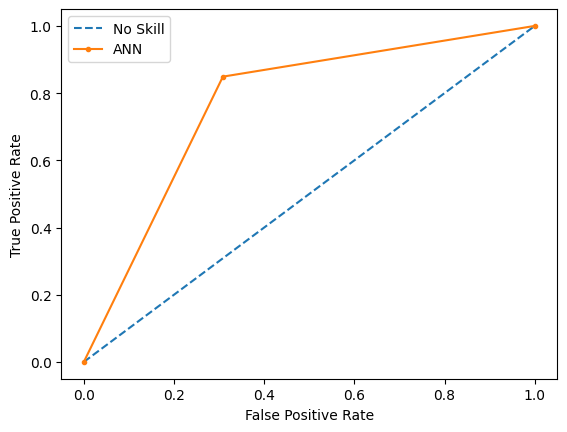

AUC score: 0.7703090972311184


In [95]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func)
auc = roc_auc_score(y_test, y_pred_func)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

Functional method has better AUC score than sequential method by about a percent.

## VIII. MODEL SAVING

In [96]:
import pickle

pickle.dump(full_pipeline, open('M1P2_pred.pkl','wb'))

Imp_model_func.save('churn_model.h5')

In [97]:
import sklearn
print(tf.__version__)
print(sklearn.__version__)
print(np.__version__)

2.9.2
1.0.2
1.21.6


## IX. MODEL INFERENCE

In this section we will try to test the functional API model to the inference dataset and we will try to use pipeline here to make the process faster.

In [98]:
inf = {'SeniorCitizen': 'No',
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 52,
 'MultipleLines': 'Yes',
 'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'Yes',
 'Contract': 'One year',
 'PaperlessBilling': 'No',
 'PaymentMethod': 'Mailed check',
 'MonthlyCharges': 96.253000}

inference = pd.DataFrame([inf])
inference

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,No,Yes,Yes,52,Yes,DSL,No,Yes,No,Yes,Yes,Yes,One year,No,Mailed check,96.253


Here we are making the pipeline

In [99]:
data_inf = full_pipeline.transform(inference)

In [100]:
Category = np.round(Imp_model_func.predict(np.array([data_inf[0]]))[0][0])
Category

1/1 [==============================] - 0s 75ms/step


0.0

In [101]:
# interpretation for churn
if Category == 0.0:
    print("The customer will not churn")
else:
    print("The customer will churn")


The customer will not churn


Here is the prediction result

---

## X. CONCLUSION

1. Succeeded in creating 2 deep learning models, namely Functional API Method, and Sequential API Method.
2. Between both the models, the best model is Functional API Method. The model has also applied hyperparameter tuning manually.
3. The evaluation metric that we use is the recall method, because we think people who are churning but are classified as not churning will be more detrimental to TELCO.
4. Inference shows that the model is working and cappable of predicting.
5. Future improvements of the model can be done by introducing more data to the model to train with and tuning the model parameters further.